In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [221]:
df = pd.read_csv('bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [222]:
df.shape

(252, 15)

In [223]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [225]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [226]:
df.duplicated().sum()

0

**Keterangan**
<br>
Tidak terdapat missing value ataupun duplicated data

<Axes: >

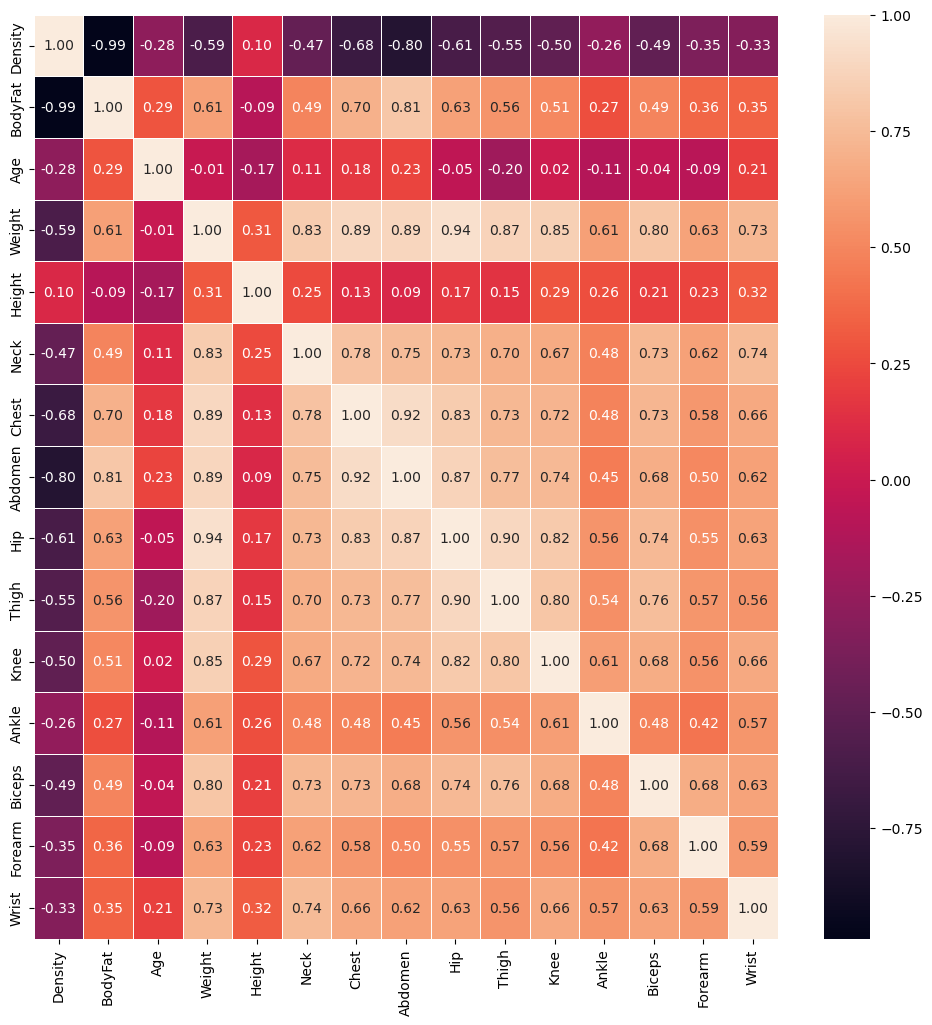

In [227]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt="0.2f")

In [228]:
X = df.drop(['BodyFat', 'Density'], axis=1)
y = df['Density']

In [229]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [230]:
trans = PowerTransformer()
X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)

In [231]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

clf = [lr, dt, rf]
hashmap = {}

In [232]:
model0 = RandomForestRegressor(n_estimators = 100, random_state = 45)

In [233]:
rf_model = model0.fit(X_train, y_train)

In [234]:
predictions_rf = rf_model.predict(X_test)
rf_r2 = r2_score(y_test , predictions_rf)
print("Random Forest R squared :", "{:.2f}%".format(100*rf_r2))

Random Forest R squared : 66.88%


In [235]:
rf_mse = mean_squared_error(predictions_rf, y_test)
rf_rmse = np.sqrt(rf_mse)
print('Random Forest Regression RMSE: %.4f' % rf_rmse)

Random Forest Regression RMSE: 0.0096


In [236]:
model1 = LinearRegression()

In [237]:
lr_model = model1.fit(X_train, y_train)

In [238]:
predictions_lr = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, predictions_lr)
print("Linear Regression R squared :", "{:.2f}%".format(100*lr_r2))

Linear Regression R squared : 69.39%


In [239]:
lr_mse = mean_squared_error(predictions_lr, y_test)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression RMSE: %.4f' % lr_rmse)

Linear Regression RMSE: 0.0092


In [240]:
model2 = DecisionTreeRegressor()

dt_model = model2.fit(X_train, y_train)
predictions_dt = dt_model.predict(X_test)
dt_r2 = r2_score(y_test, predictions_dt)
print("Decision Tree R squared :", "{:.2f}%".format(100*dt_r2))
dt_mse = mean_squared_error(predictions_dt, y_test)
dt_rmse = np.sqrt(dt_mse)
print('Decision Tree Regressor RMSE: %.4f' % dt_rmse)

Decision Tree R squared : 25.16%
Decision Tree Regressor RMSE: 0.0144


In [241]:
X_new1 = {
    "Age": 41,
    "Weight": 212.00,
    "Height": 71.50,
    "Neck": 41.5,
    "Chest": 106.6,
    "Abdomen": 104.3,
    "Hip": 106.0,
    "Thigh": 65.0,
    "Knee": 40.2,
    "Ankle": 23.0,
    "Biceps": 35.8,
    "Forearm": 31.5,
    "Wrist": 18.8
}

X_new1 = pd.DataFrame(X_new1, index=[0])
density1 = dt_model.predict(X_new1)
fat1 = ((495/density1) - 450)
print(f'Density: {density1} g/cc\nPercentage Body Fat: {fat1} %\n')

Density: [1.0217] g/cc
Percentage Body Fat: [34.48663991] %



In [242]:
AGE = float(input("Umur: "))
WEIGHT = float(input("Berat Badan (lbs): "))
HEIGHT = float(input("Tinggi Badan (inches): "))
NECK = float(input("Lingkar Leher (cm): "))
CHEST = float(input("Lingkar Dada (cm): "))
ABDOMEN = float(input("Lingkar Perut (cm): "))
HIP = float(input("Lingkar Pinggang (cm): "))
THIGH = float(input("Lingkar Paha (cm): "))
KNEE = float(input("Lingkar Lutut (cm): "))
ANKLE = float(input("Lingkar Pergelangan Kaki (cm): "))
BICEPS = float(input("Lingkar Biceps (cm): "))
FOREARM = float(input("Lingkar Lengan (cm): "))
WRIST = float(input("Lingkar Pergelangan Tangan (cm): "))


X_new2 = {
    "Age": AGE,
    "Weight": WEIGHT,
    "Height": HEIGHT,
    "Neck": NECK,
    "Chest": CHEST,
    "Abdomen": ABDOMEN,
    "Hip": HIP,
    "Thigh": THIGH,
    "Knee": KNEE,
    "Ankle": ANKLE,
    "Biceps": BICEPS,
    "Forearm": FOREARM,
    "Wrist": WRIST
}

X_new2 = pd.DataFrame(X_new2, index=[0])
density2 = rf_model.predict(X_new2)
fat2 = ((495/density2) - 450)
print(f'Density: {density2} g/cc\nPercentage Body Fat: {fat2} %\n')

Density: [1.032397] g/cc
Percentage Body Fat: [29.46671678] %

